<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p14_stability.m** - explore discrete and continuous time -> infinity
#### explores the stability of a system in both discrete and continuous time, visualizing the eigenvalues of the system matrix and how the norm of the state vector evolves over time.

This matrix construction generates a random, mostly stable matrix. It allows you to study the stability and behavior of dynamic systems while ensuring that the matrix is not purely random (which could be unstable). The shift with **-0.8 * np.eye(9)** biases the matrix towards stability by keeping the eigenvalues in a range that makes the system's dynamics more predictable and stable over time.

In most cases, if the matrix A has an unstable eigenstructure (i.e., eigenvalues with magnitude greater than 1), the norm of x grows exponentially. That's exactly what you will be seeing below.

As the matrix exponential **expAdt** is applied iteratively, the norm of the vector x decreases smoothly. This indicates that the matrix A is "contracting" the vector in the direction of its eigenvectors. This shrinking behavior is typical when the matrix A has eigenvalues with negative real parts or small magnitudes. The decreasing values represent a stable continuous-time system in which the vector's size diminishes over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig, expm

In [2]:
## Hardcode matrix A to show rising discrete norm and falling cont norm.
A = np.array([
    [-8.93698494e-01, -1.64205853e-01, -2.76354002e-01,  6.94590161e-01, -1.72172056e-01, -4.13317225e-02, -4.34833733e-01, -1.60753457e-01, -1.61635785e-01],
    [ 1.97742088e-01, -7.97789353e-01, -4.73039770e-01, -4.54278347e-01,  1.48836965e-01,  2.29441192e-01,  4.39542572e-02,  1.94398498e-03,  3.32215228e-01],
    [ 2.49802475e-01,  4.61392645e-01, -8.71486843e-01,  6.79162245e-01,  1.55900948e-01, -2.30736337e-02,  5.39277914e-02,  8.49255963e-01,  2.07316072e-01],
    [-8.61649038e-01,  1.37983450e-01,  3.65844472e-01, -1.06332883e+00,  1.40969435e-01, -1.28585323e-01, -4.13977924e-01,  1.65085515e-01,  3.85018888e-01],
    [ 1.97964388e-01,  2.01933081e-01,  4.65479473e-01, -6.50204614e-02, -9.31565552e-01, -3.86623637e-02, -2.69658758e-01, -2.78079366e-01, -3.23212398e-01],
    [ 1.15884265e-01,  5.38051232e-02, -2.33330825e-01,  5.00788592e-01,  4.89338964e-01, -1.01701486e+00, -1.03652963e-01, -2.83721735e-02, -2.06854207e-02],
    [ 2.10990633e-01, -3.52280841e-03,  8.79000414e-02,  2.00141749e-01, -2.14763998e-01, -1.76526863e-01, -8.23771360e-01, -2.17703948e-01,  3.22033261e-01],
    [-2.33632846e-01,  4.36972392e-02,  3.73873577e-01, -4.69691410e-01, -1.12178481e-01, -4.84677950e-01,  4.81198123e-01, -1.11347791e+00,  1.38532293e-01],
    [ 2.60430056e-01,  3.48883650e-01,  6.24826073e-04,  7.90710212e-02,  9.03395576e-02,  3.96627677e-01,  1.60440774e-01, -8.28051185e-04, -9.89792932e-01]
])

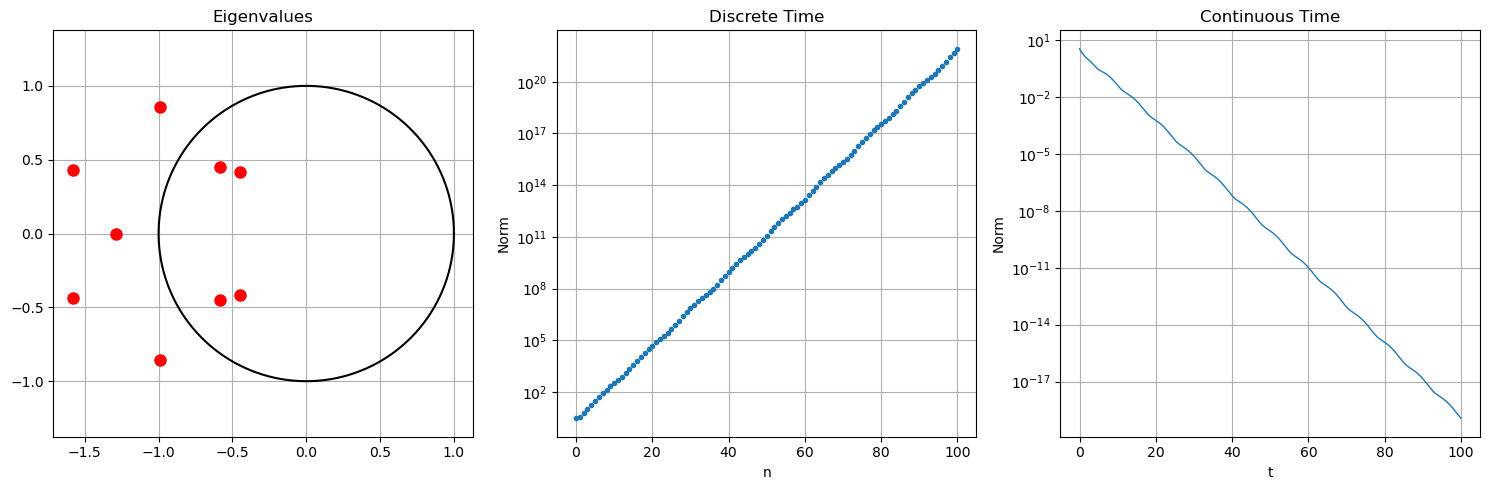

In [3]:
plt.figure(figsize=(15, 5)) 

dim = A.shape[0]

e = eig(A)[0]
circle = np.exp(2j * np.pi * np.linspace(0, 1, 300))

## subplot 1: Plot eigenvalues on the complex plane
plt.subplot(131)  
plt.plot(e.real, e.imag, '.r', markersize=16)
plt.plot(circle.real, circle.imag, 'k')
plt.axis('equal')
plt.grid(True)
plt.title('Eigenvalues')

## discrete time evolution
x = np.random.randn(dim)
normvec = [np.linalg.norm(x)]

for n in range(100):
    x = A @ x ## repeated multiplication by the matrix A
    normx = np.linalg.norm(x)
    normvec.append(normx)
# print(normvec)

## sbplot 2: Discrete time norm evolution
plt.subplot(132)  
plt.semilogy(range(101), normvec, '.', markersize=6)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Norm')
plt.title('Discrete Time')

## continuous time evolution
x = np.random.randn(dim)
normvec = [np.linalg.norm(x)]
dt = 0.1
expAdt = expm(dt * A)

for t in np.arange(dt, 100 + dt, dt):
    x = expAdt @ x
    normx = np.linalg.norm(x)
    normvec.append(normx)

## subplot 3: Continuous time norm evolution
plt.subplot(133)  
plt.semilogy(np.arange(0, 100 + dt, dt), normvec, '-', linewidth=1)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Norm')
plt.title('Continuous Time')

plt.tight_layout()
plt.show()